In [140]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

# Clean EEG Data

In [103]:
og_eeg = pd.read_csv('eeg-data.csv')
og_eeg.head(5)
og_eeg.count()
og_eeg.dtypes

Unnamed: 0            int64
id                    int64
indra_time           object
browser_latency      object
reading_time         object
attention_esense      int64
meditation_esense     int64
eeg_power            object
raw_values           object
signal_quality        int64
createdAt            object
updatedAt            object
label                object
dtype: object

In [104]:
og_eeg.describe()

,Unnamed: 0,id,attention_esense,meditation_esense,signal_quality
count,30013.000000,30013.000000,30013.000000,30013.000000,30013.000000
mean,15010.952521,13.685570,40.284710,46.638723,25.871856
std,8666.911131,8.479506,24.446432,26.153089,64.636640
min,0.000000,1.000000,0.000000,0.000000,0.000000
25%,7506.000000,6.000000,24.000000,34.000000,0.000000
50%,15010.000000,13.000000,43.000000,50.000000,0.000000
75%,22517.000000,20.000000,57.000000,64.000000,0.000000
max,30021.000000,30.000000,100.000000,100.000000,200.000000


In [105]:
#filter useless columns out
og_eeg.drop(['createdAt','updatedAt','browser_latency','indra_time','raw_values'], axis =1)

,Unnamed: 0,id,reading_time,attention_esense,meditation_esense,eeg_power,signal_quality,label
0,3730,12,2015-05-09 16:13:40.954,0,0,"[944412.0, 111373.0, 52404.0, 28390.0, 3237.0,...",200,unlabeled
1,3732,12,2015-05-09 16:13:41.964,0,0,"[1793049.0, 89551.0, 3896.0, 21727.0, 9301.0, ...",200,unlabeled
2,3734,12,2015-05-09 16:13:42.950,0,0,"[400192.0, 640624.0, 153087.0, 69733.0, 98854....",200,unlabeled
3,3735,12,2015-05-09 16:13:43.935,0,0,"[681192.0, 138630.0, 67891.0, 26459.0, 592240....",200,unlabeled
4,3737,12,2015-05-09 16:13:44.936,0,0,"[268406.0, 197772.0, 190654.0, 266433.0, 91683...",200,unlabeled
...,...,...,...,...,...,...,...,...
30008,10584,17,2015-05-09 17:05:51.141,0,0,"[477547.0, 152641.0, 5145.0, 9858.0, 39852.0, ...",200,unlabeled
30009,10589,17,2015-05-09 17:05:52.134,0,0,"[388959.0, 48072.0, 11231.0, 14509.0, 25687.0,...",200,unlabeled
30010,10590,17,2015-05-09 17:05:53.120,0,0,"[53357.0, 18929.0, 11169.0, 11818.0, 20640.0, ...",200,unlabeled
30011,10587,17,2015-05-09 17:05:54.142,0,0,"[40891.0, 108300.0, 19622.0, 14285.0, 11863.0,...",200,unlabeled


In [106]:
eeg = og_eeg[og_eeg['signal_quality'] < 100]
#eeg['eeg_power'] = eeg['eeg_power'].astype('|S')
eeg.count()

Unnamed: 0           26460
id                   26460
indra_time           26460
browser_latency      26460
reading_time         26460
attention_esense     26460
meditation_esense    26460
eeg_power            26460
raw_values           26460
signal_quality       26460
createdAt            26460
updatedAt            26460
label                26460
dtype: int64

In [107]:
wavelengths = eeg['eeg_power'].apply(pd.Series)
wavelengths

,0
125,"[124849.0, 40990.0, 12054.0, 4747.0, 9062.0, 2..."
129,"[146280.0, 61896.0, 47702.0, 30254.0, 36705.0,..."
133,"[185654.0, 33246.0, 5496.0, 18008.0, 4946.0, 7..."
137,"[67075.0, 18337.0, 18521.0, 6884.0, 4322.0, 28..."
141,"[35799.0, 45197.0, 20011.0, 13005.0, 19378.0, ..."
...,...
28221,"[224197.0, 47916.0, 24825.0, 36953.0, 32502.0,..."
28231,"[768190.0, 238996.0, 40281.0, 145693.0, 364558..."
28238,"[124249.0, 7131.0, 13139.0, 6057.0, 18770.0, 1..."
28239,"[124249.0, 7131.0, 13139.0, 6057.0, 18770.0, 1..."


In [108]:
wavelengths = wavelengths[0].str.split(',', expand = True)
wavelengths

,0,1,2,3,4,5,6,7
125,[124849.0,40990.0,12054.0,4747.0,9062.0,2498.0,477.0,175.0]
129,[146280.0,61896.0,47702.0,30254.0,36705.0,26642.0,8717.0,2101.0]
133,[185654.0,33246.0,5496.0,18008.0,4946.0,7112.0,1248.0,563.0]
137,[67075.0,18337.0,18521.0,6884.0,4322.0,2863.0,1472.0,1197.0]
141,[35799.0,45197.0,20011.0,13005.0,19378.0,12831.0,4085.0,2972.0]
...,...,...,...,...,...,...,...,...
28221,[224197.0,47916.0,24825.0,36953.0,32502.0,42451.0,63148.0,42303.0]
28231,[768190.0,238996.0,40281.0,145693.0,364558.0,129728.0,82134.0,136602.0]
28238,[124249.0,7131.0,13139.0,6057.0,18770.0,13394.0,7199.0,2241.0]
28239,[124249.0,7131.0,13139.0,6057.0,18770.0,13394.0,7199.0,2241.0]


In [109]:
wavelengths[0] = wavelengths[0].str.replace('[','')
wavelengths[7] = wavelengths[7].str.replace(']','')
wavelengths_1 = wavelengths.apply(pd.to_numeric)
wavelengths_1

,0,1,2,3,4,5,6,7
125,124849.0,40990.0,12054.0,4747.0,9062.0,2498.0,477.0,175.0
129,146280.0,61896.0,47702.0,30254.0,36705.0,26642.0,8717.0,2101.0
133,185654.0,33246.0,5496.0,18008.0,4946.0,7112.0,1248.0,563.0
137,67075.0,18337.0,18521.0,6884.0,4322.0,2863.0,1472.0,1197.0
141,35799.0,45197.0,20011.0,13005.0,19378.0,12831.0,4085.0,2972.0
...,...,...,...,...,...,...,...,...
28221,224197.0,47916.0,24825.0,36953.0,32502.0,42451.0,63148.0,42303.0
28231,768190.0,238996.0,40281.0,145693.0,364558.0,129728.0,82134.0,136602.0
28238,124249.0,7131.0,13139.0,6057.0,18770.0,13394.0,7199.0,2241.0
28239,124249.0,7131.0,13139.0,6057.0,18770.0,13394.0,7199.0,2241.0


In [ ]:
wavelengths_1 = wavelengths_1.rename(columns = {0: 'delta',1:'theta',2:'low_alpha', 3:'high_alpha',4:'low_beta',5:'high_beta',6:'low_gamma',7:'mid+gamma'})
wavelengths_1

# Correlation Between Wavelengths

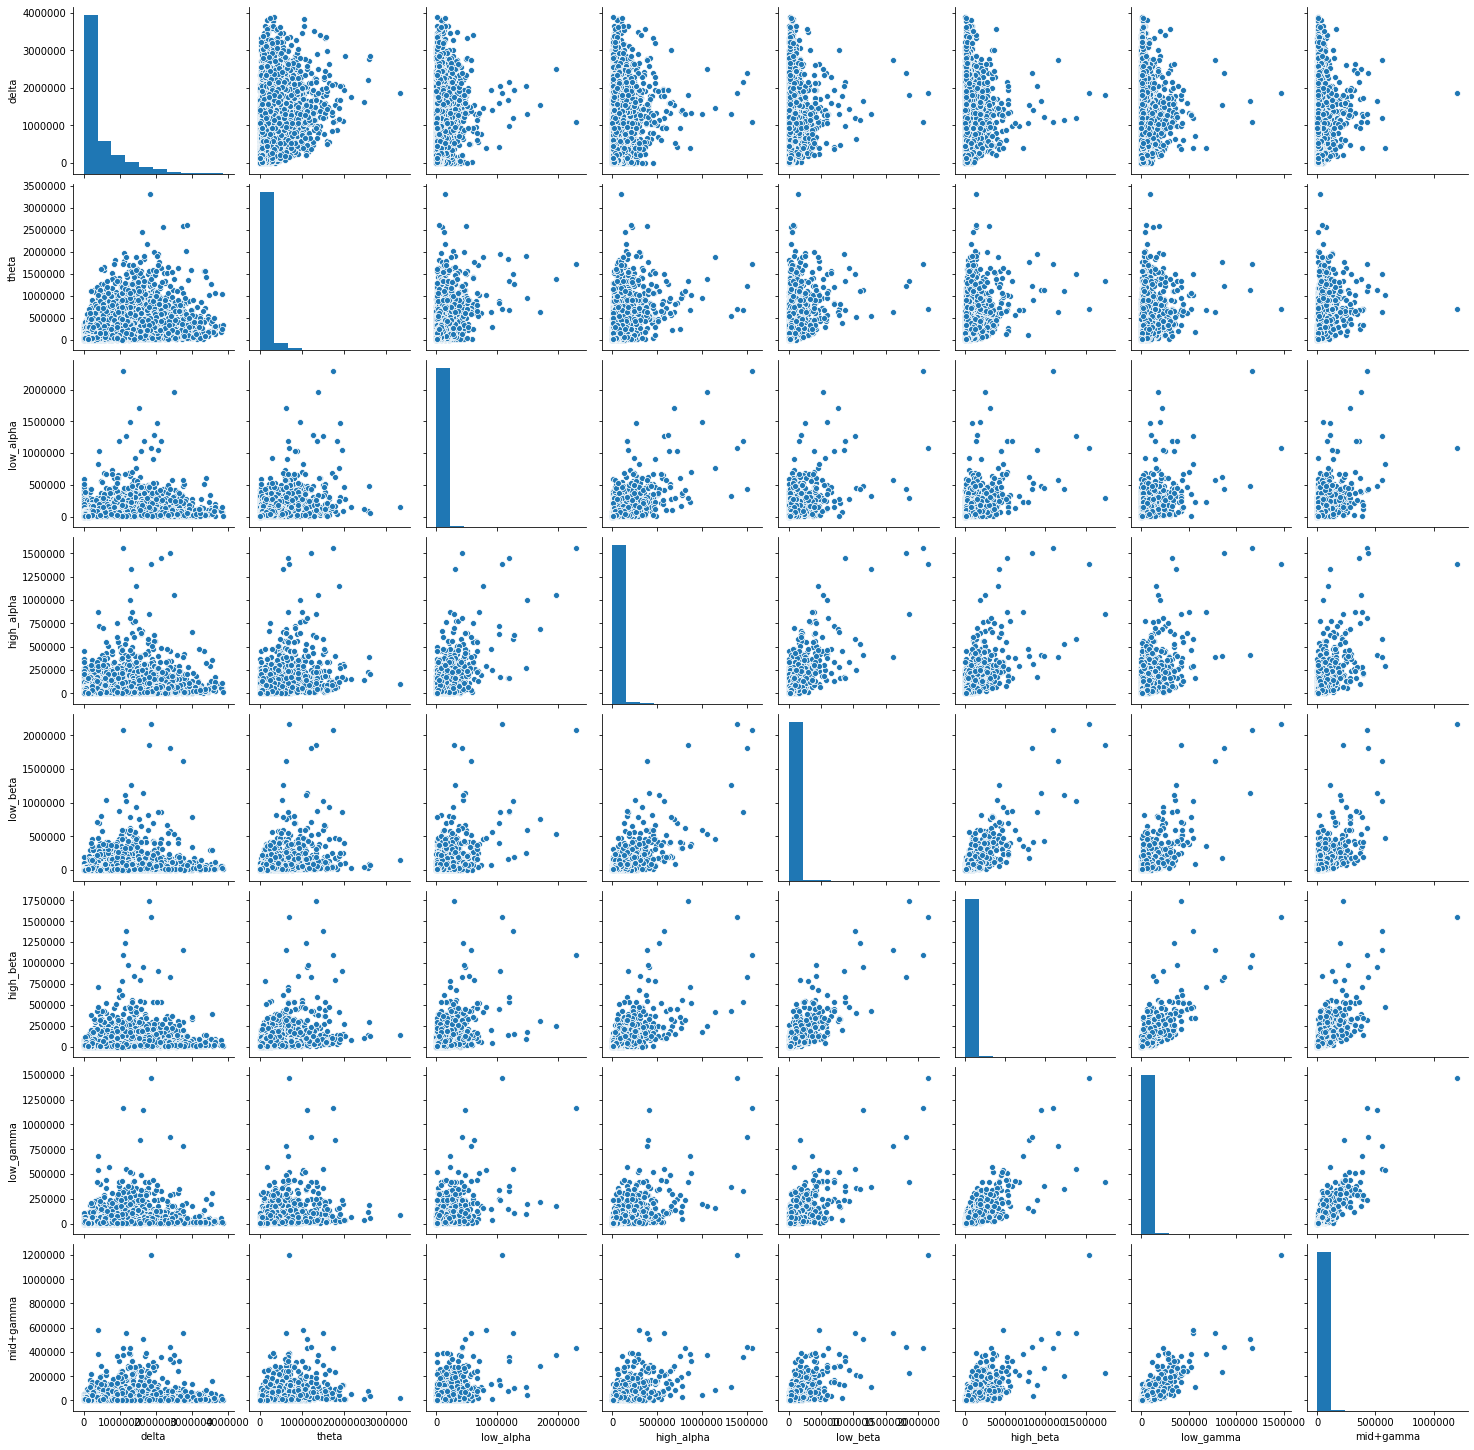

In [144]:
sns.pairplot(wavelengths_1, palette = 'coolwarm')

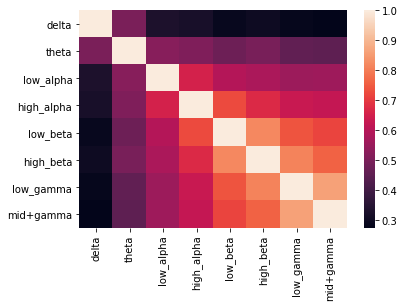

In [145]:
sns.heatmap(wavelengths_1.corr())

#Delta and Theta most uncorrelated with others 

In [111]:
eeg_final = eeg.join(wavelengths_1)
eeg_final

,Unnamed: 0,id,indra_time,browser_latency,reading_time,attention_esense,meditation_esense,eeg_power,raw_values,signal_quality,...,updatedAt,label,delta,theta,low_alpha,high_alpha,low_beta,high_beta,low_gamma,mid+gamma
125,28006,8,2015-05-09 23:14:45.817,-19,2015-05-09 16:14:45.592,0,0,"[124849.0, 40990.0, 12054.0, 4747.0, 9062.0, 2...","[11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11....",25,...,2015-05-09 23:14:45.923+00,unlabeled,124849.0,40990.0,12054.0,4747.0,9062.0,2498.0,477.0,175.0
129,28005,8,2015-05-09 23:14:46.424,-19,2015-05-09 16:14:46.586,0,0,"[146280.0, 61896.0, 47702.0, 30254.0, 36705.0,...","[-56.0, -30.0, -12.0, -10.0, -19.0, -20.0, -13...",25,...,2015-05-09 23:14:46.669+00,unlabeled,146280.0,61896.0,47702.0,30254.0,36705.0,26642.0,8717.0,2101.0
133,28008,8,2015-05-09 23:14:47.327,-20,2015-05-09 16:14:47.588,0,0,"[185654.0, 33246.0, 5496.0, 18008.0, 4946.0, 7...","[162.0, 168.0, 189.0, 208.0, 187.0, 164.0, 165...",0,...,2015-05-09 23:14:47.67+00,unlabeled,185654.0,33246.0,5496.0,18008.0,4946.0,7112.0,1248.0,563.0
137,28009,8,2015-05-09 23:14:48.537,-20,2015-05-09 16:14:48.587,0,0,"[67075.0, 18337.0, 18521.0, 6884.0, 4322.0, 28...","[70.0, 77.0, 81.0, 81.0, 83.0, 76.0, 70.0, 70....",0,...,2015-05-09 23:14:48.672+00,unlabeled,67075.0,18337.0,18521.0,6884.0,4322.0,2863.0,1472.0,1197.0
141,28010,8,2015-05-09 23:14:49.448,-20,2015-05-09 16:14:49.561,0,0,"[35799.0, 45197.0, 20011.0, 13005.0, 19378.0, ...","[56.0, 58.0, 66.0, 67.0, 60.0, 54.0, 45.0, 51....",0,...,2015-05-09 23:14:49.643+00,unlabeled,35799.0,45197.0,20011.0,13005.0,19378.0,12831.0,4085.0,2972.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28221,11748,19,2015-05-09 23:49:39.204,14879,2015-05-09 16:49:24.545,66,30,"[224197.0, 47916.0, 24825.0, 36953.0, 32502.0,...","[-344.0, -330.0, -317.0, -305.0, -292.0, -279....",51,...,2015-05-09 23:49:09.835+00,unlabeled,224197.0,47916.0,24825.0,36953.0,32502.0,42451.0,63148.0,42303.0
28231,11751,19,2015-05-09 23:49:40.411,14855,2015-05-09 16:49:25.747,66,30,"[768190.0, 238996.0, 40281.0, 145693.0, 364558...","[-2048.0, -2048.0, -2048.0, -2048.0, -2048.0, ...",80,...,2015-05-09 23:49:11.003+00,unlabeled,768190.0,238996.0,40281.0,145693.0,364558.0,129728.0,82134.0,136602.0
28238,11749,19,2015-05-09 23:49:41.595,14855,2015-05-09 16:49:26.870,66,30,"[124249.0, 7131.0, 13139.0, 6057.0, 18770.0, 1...","[-19.0, -14.0, -11.0, -10.0, -8.0, -6.0, -4.0,...",80,...,2015-05-09 23:49:12.298+00,unlabeled,124249.0,7131.0,13139.0,6057.0,18770.0,13394.0,7199.0,2241.0
28239,11752,19,2015-05-09 23:49:41.595,14855,2015-05-09 16:49:26.870,66,30,"[124249.0, 7131.0, 13139.0, 6057.0, 18770.0, 1...","[-19.0, -14.0, -11.0, -10.0, -8.0, -6.0, -4.0,...",80,...,2015-05-09 23:49:12.17+00,unlabeled,124249.0,7131.0,13139.0,6057.0,18770.0,13394.0,7199.0,2241.0


# Clean Stimulus Data

In [5]:
stimulus = pd.read_csv('stimulus-times.csv')
stimulus

,event name,time
0,everyone paired,2015-05-09 23:26:34.35+00
1,blinkInstruction,2015-05-09 23:32:36.911+00
2,blink1,2015-05-09 23:32:41.371+00
3,blink2,2015-05-09 23:32:42.872+00
4,blink3,2015-05-09 23:32:44.371+00
...,...,...
126,colorRound5-3,2015-05-09 23:48:41.35+00
127,colorRound5-4,2015-05-09 23:48:44.35+00
128,colorRound5-5,2015-05-09 23:48:47.35+00
129,colorRound5-6,2015-05-09 23:48:50.35+00


# Clean Subjects Data

In [6]:
subjects = pd.read_csv('subject-metadata.csv')
subjects.head(5)

,ID,Session,Seen video before?,Chosen color,Saw icons?,Gender,Wear contacts
0,1,1,n,b,n,f,n
1,2,1,n,b,n,m,n
2,3,1,n,r,n,f,n
3,4,1,n,y,n,m,y
4,5,1,n,b,n,m,n


# Join Cleaned EEG and Subject Dataset 

In [113]:
master_df =  pd.merge(left=eeg_final, right=subjects, left_on='id', right_on='ID')
master_df = master_df.drop('ID', axis = 1)
master_df.columns

Index(['Unnamed: 0', 'id', 'indra_time', 'browser_latency', 'reading_time',
       'attention_esense', 'meditation_esense', 'eeg_power', 'raw_values',
       'signal_quality', 'createdAt', 'updatedAt', 'label', 'delta', 'theta',
       'low_alpha', 'high_alpha', 'low_beta', 'high_beta', 'low_gamma',
       'mid+gamma', 'Session', 'Seen video before?', 'Chosen color',
       'Saw icons?', 'Gender', 'Wear contacts'],
      dtype='object')

# Basic Classfiication KNN

In [94]:
from sklearn.model_selection import train_test_split

In [129]:
features = master_df.drop(['Unnamed: 0', 'id', 'indra_time','reading_time', 'browser_latency', 'eeg_power', 'raw_values',
       'signal_quality', 'createdAt', 'updatedAt', 'Session', 'Seen video before?', 'Chosen color',
       'Saw icons?', 'Gender', 'Wear contacts','label'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(features,master_df['label'],
                                                    test_size=0.30)

In [130]:
features.columns

Index(['attention_esense', 'meditation_esense', 'delta', 'theta', 'low_alpha',
       'high_alpha', 'low_beta', 'high_beta', 'low_gamma', 'mid+gamma'],
      dtype='object')

In [131]:
from sklearn.neighbors import KNeighborsClassifier

In [132]:
knn = KNeighborsClassifier(n_neighbors = 5)

In [133]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

# KNN Predictions and Evaluations

In [134]:
pred = knn.predict(X_test)

In [135]:
from sklearn.metrics import classification_report, confusion_matrix

In [136]:
print(confusion_matrix(y_test,pred))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 1 1 0]
 [0 0 0 ... 0 0 0]]


In [137]:
print(classification_report(y_test,pred))

                              precision    recall  f1-score   support

                      blink1       0.00      0.00      0.00        11
                      blink2       0.00      0.00      0.00        18
                      blink3       0.00      0.00      0.00        16
                      blink4       0.00      0.00      0.00        14
                      blink5       0.00      0.00      0.00         9
            blinkInstruction       0.00      0.00      0.00        43
           colorInstruction1       0.03      0.03      0.03        86
           colorInstruction2       0.02      0.01      0.02       148
               colorRound1-1       0.03      0.03      0.03        34
               colorRound1-2       0.00      0.00      0.00        37
               colorRound1-3       0.00      0.00      0.00        42
               colorRound1-4       0.00      0.00      0.00        32
               colorRound1-5       0.06      0.02      0.03        44
               colo

# Optimizing K Value for KNN

In [138]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

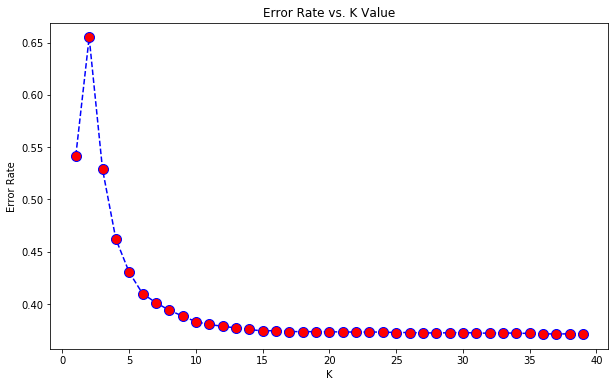

In [141]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

# Retrain with Optimal K Value

In [143]:
#K = 15
knn = KNeighborsClassifier(n_neighbors=15)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=30')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

#little higher accuracy but still not great

WITH K=30


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]]


                              precision    recall  f1-score   support

                      blink1       0.00      0.00      0.00        11
                      blink2       0.00      0.00      0.00        18
                      blink3       0.00      0.00      0.00        16
                      blink4       0.00      0.00      0.00        14
                      blink5       0.00      0.00      0.00         9
            blinkInstruction       0.00      0.00      0.00        43
           colorInstruction1       0.00      0.00      0.00        86
           colorInstruction2       0.00      0.00      0.00       148
               colorRound1-1       0.00      0.00      0.00        34
               colorRound1-2       0.00      0.00      0.00        37
               colorRound1-3       0.00      0.00      0.00        42
               colorRound

C:\Users\Seran\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [146]:
# Group together all math rounds as one label
# same for colour rounds
# cannot get any accuracy when differentiating between maths and/or colour
# possibly group all tasks in broad 5 categories

In [ ]:
#Test Per Subject
# Better for Accuracy, EEG signals may be highly user specific
